In [55]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler

%matplotlib inline

ModuleNotFoundError: No module named 'sklearn'

In [24]:
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [25]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


To take a look at the distribution of patients with and without heart disease, we plot that column of the dataframe. The blue column corresponds to the patients with heart disease, the red column contains patients without heart disease. 

<AxesSubplot:>

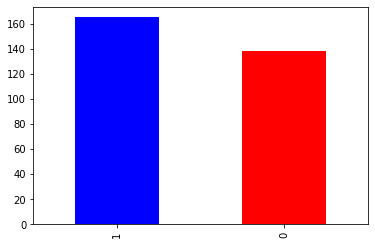

In [26]:
data.target.value_counts().plot(kind = "bar", color = ["blue", "red"])

In [27]:
cat_vals = []
cont_vals = []
for i in data.columns:
    #print('==============================')
    print("------------------------------")
    print("{0} : {1}".format(i, data[i].unique()))
    if len(data[i].unique()) <= 10:
        cat_vals.append(i)
    else:
        cont_vals.append(i)

------------------------------
age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
------------------------------
sex : [1 0]
------------------------------
cp : [3 2 1 0]
------------------------------
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
------------------------------
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 3

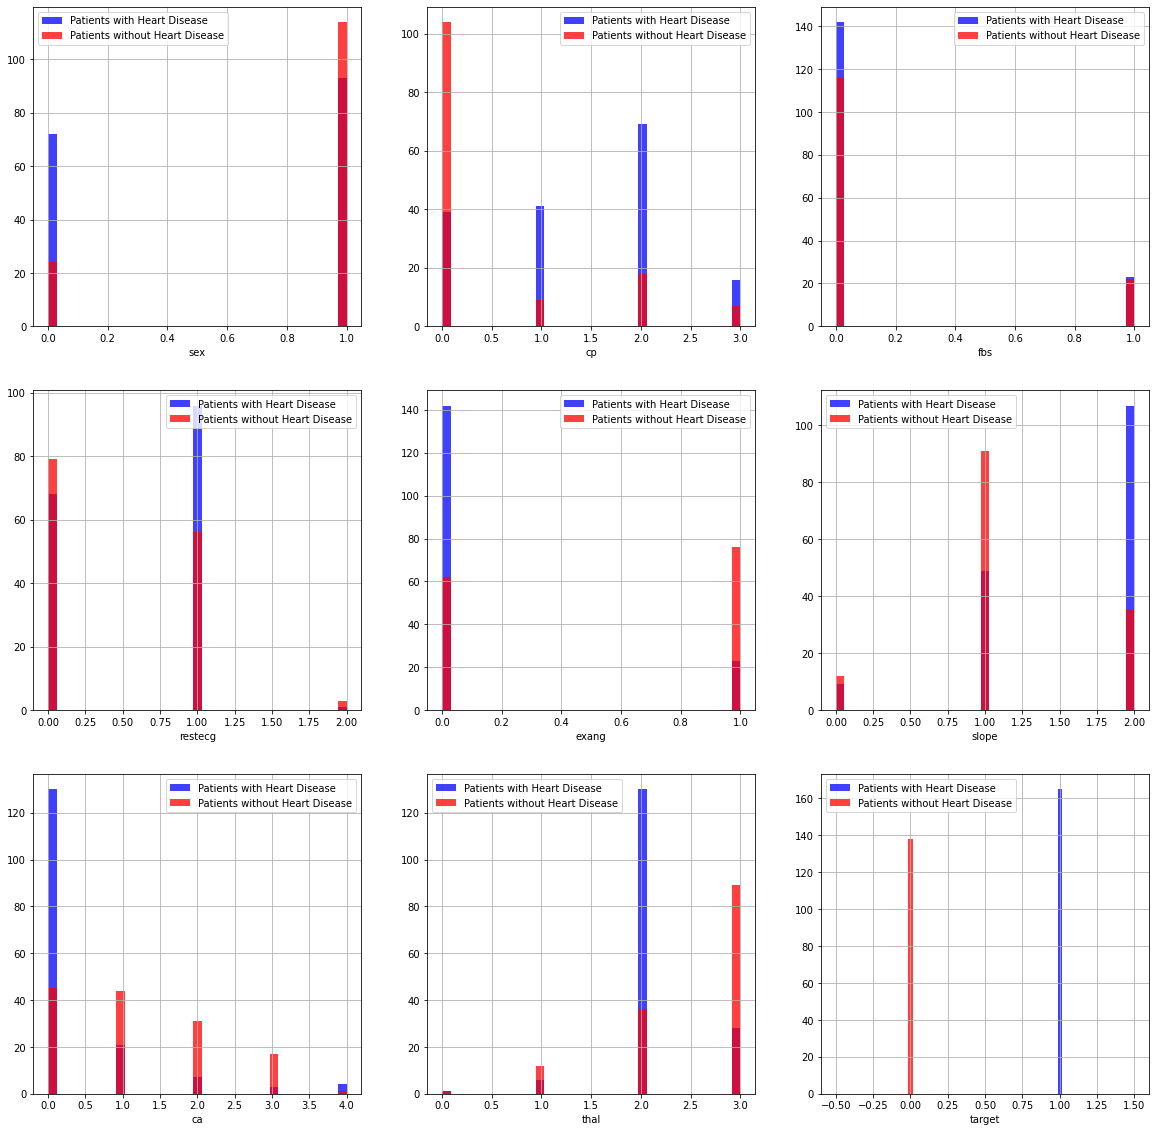

In [40]:
plt.figure(figsize = (20, 20))
for i, j in enumerate(cat_vals, 1):
    plt.subplot(3, 3, i)
    data[data["target"] == 1][j].hist(bins = 35, color = "blue", \
                                      label = "Patients with Heart Disease", alpha = 0.75)
    data[data["target"] == 0][j].hist(bins = 35, color = "red", \
                                      label = "Patients without Heart Disease", alpha = 0.75)
    plt.legend()
    plt.xlabel(j)

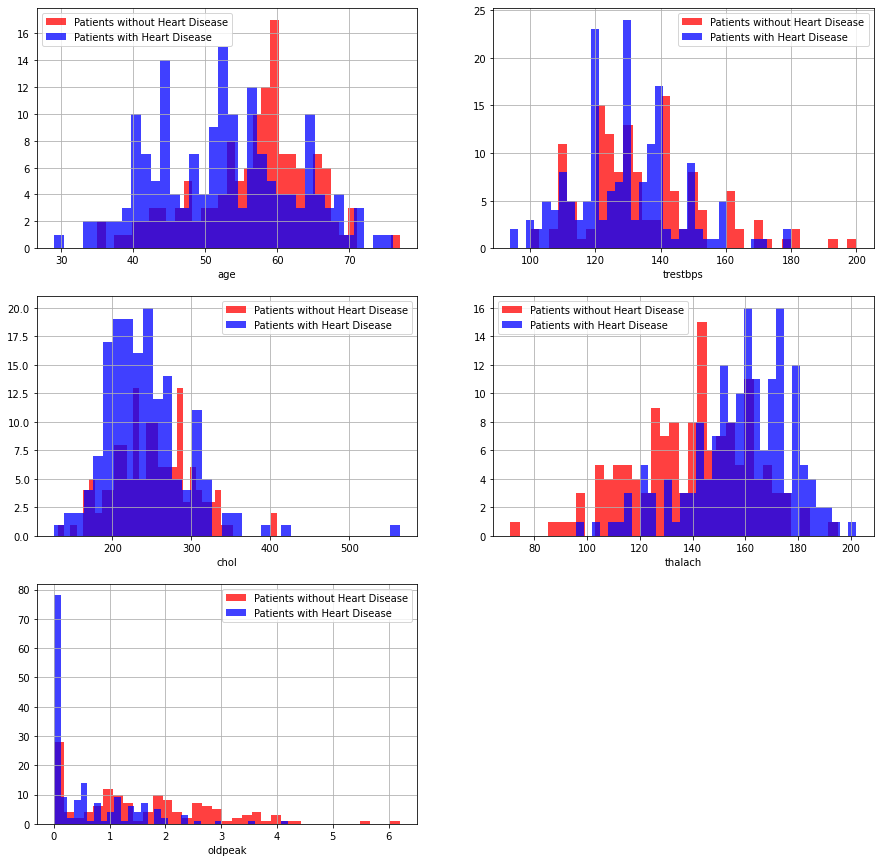

In [41]:
plt.figure(figsize=(15, 15))

for i, j in enumerate(cont_vals, 1):
    plt.subplot(3, 2, i)
    data[data["target"] == 0][j].hist(bins=35, color = 'red', label = "Patients without Heart Disease", alpha = 0.75)
    data[data["target"] == 1][j].hist(bins=35, color = 'blue', label = "Patients with Heart Disease", alpha = 0.75)
    plt.legend()
    plt.xlabel(j)

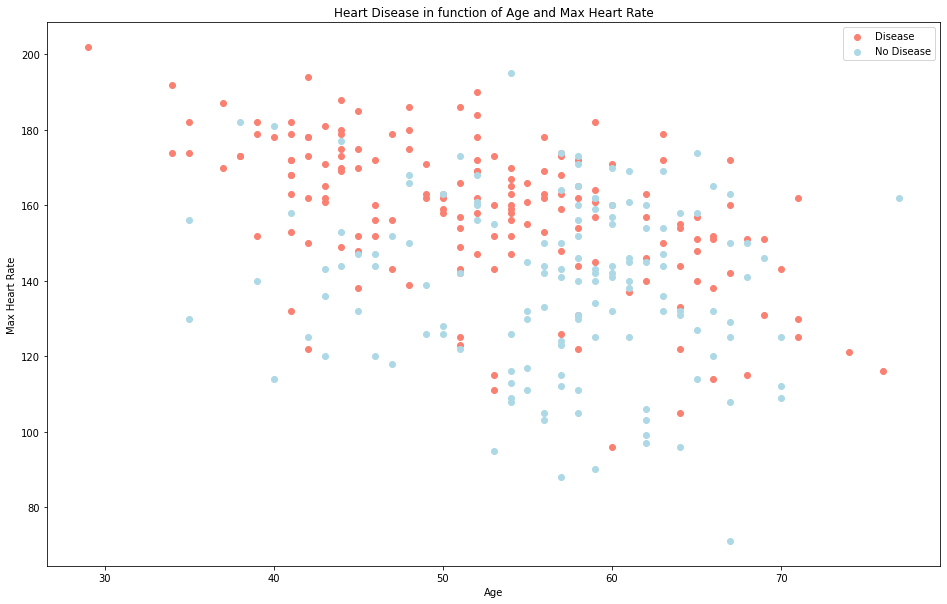

In [49]:
plt.figure(figsize = (16, 10))
plt.scatter(data.age[data.target == 1], data.thalach[data.target == 1], c = "salmon")
plt.scatter(data.age[data.target == 0], data.thalach[data.target == 0], c = "lightblue")
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"])

(14.5, -0.5)

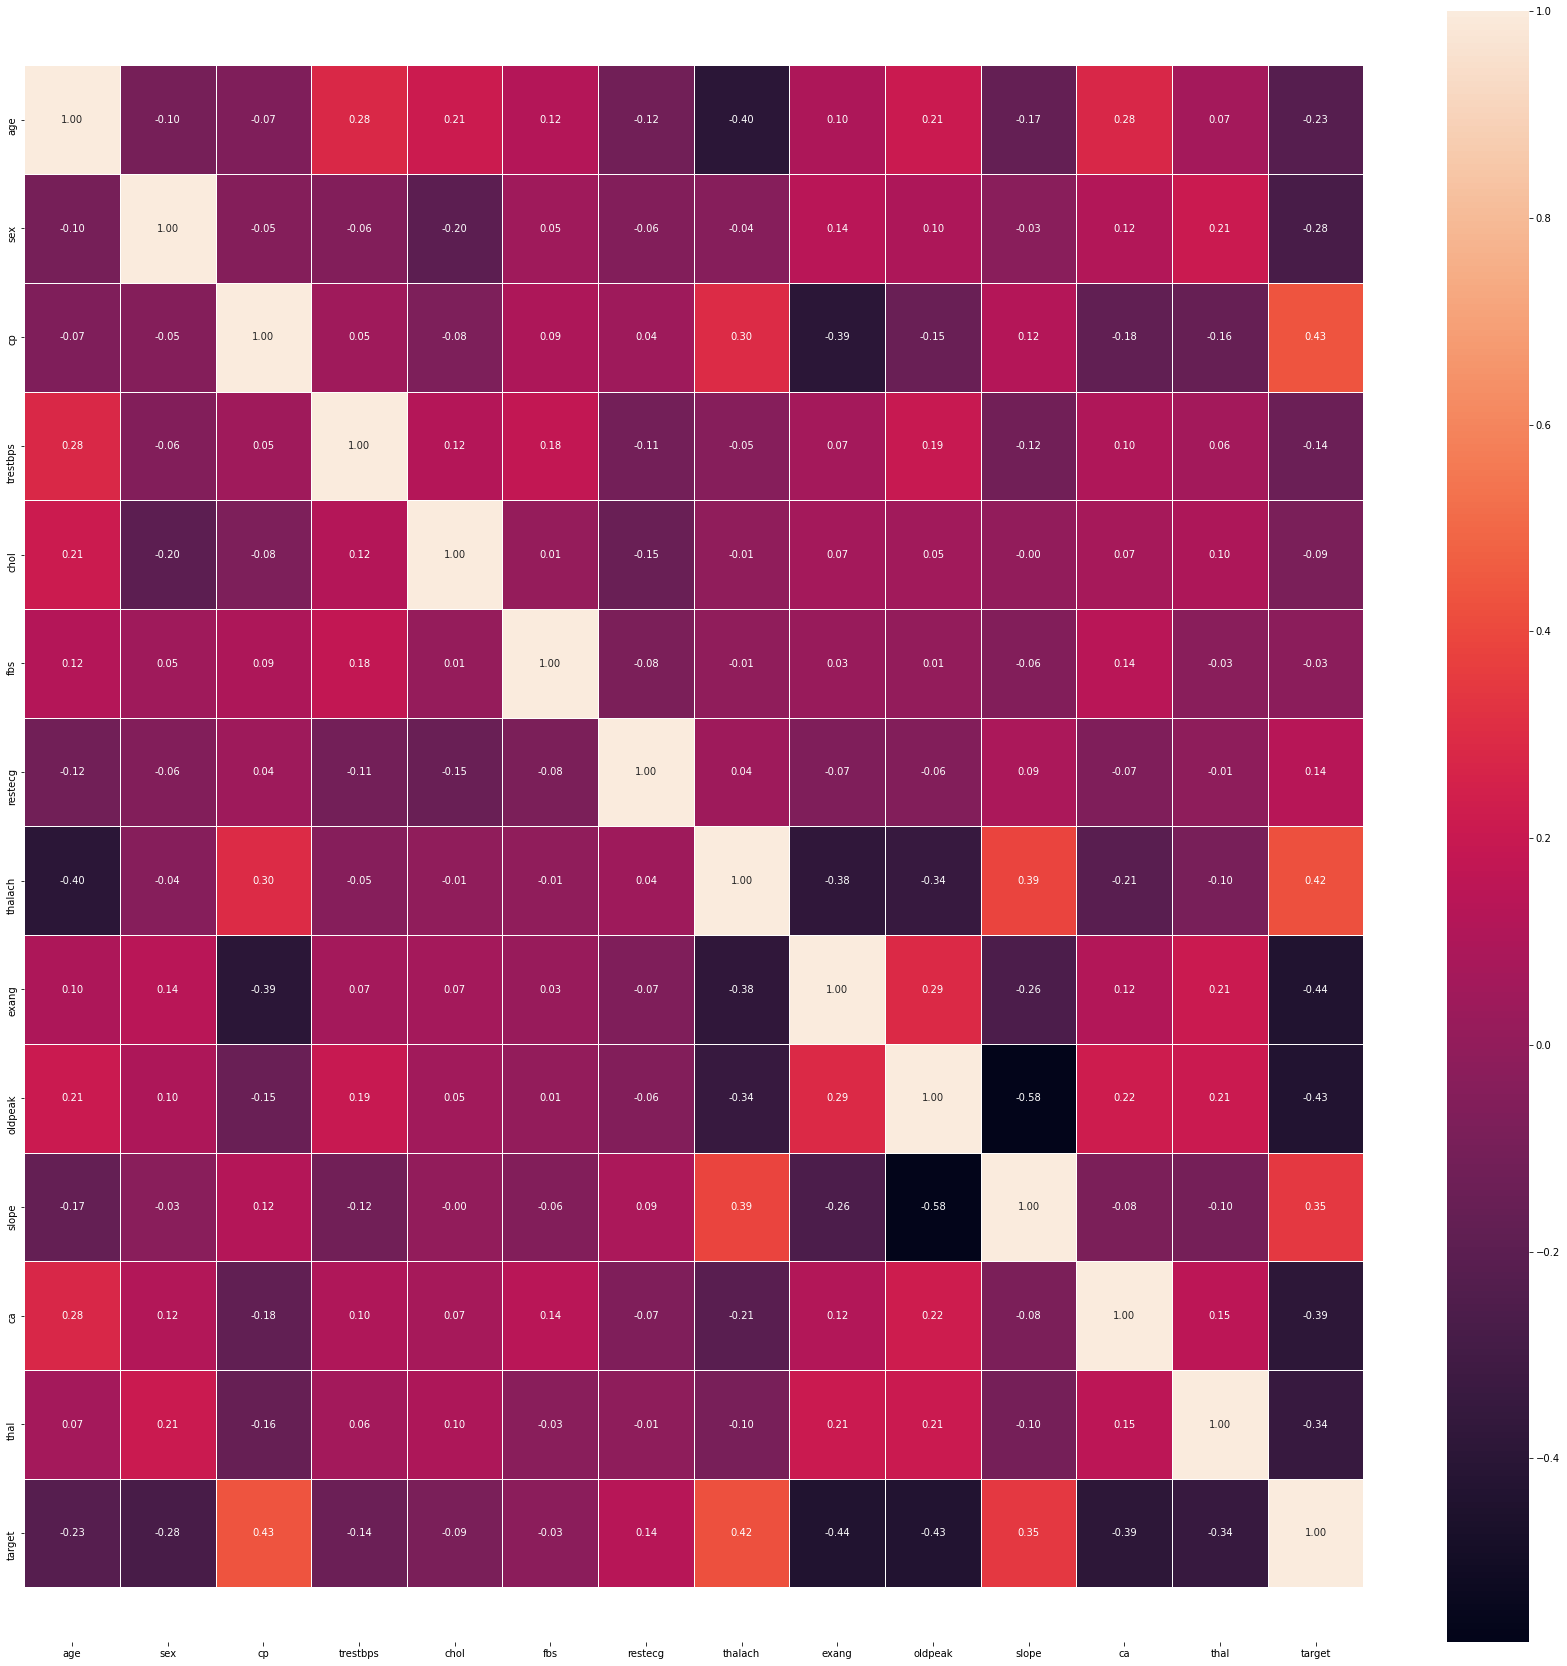

In [52]:
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize = (30, 30))
ax = sns.heatmap(corr_matrix, annot = True, linewidths = 0.5, fmt = ".2f")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

<AxesSubplot:title={'center':'Correlation with target'}>

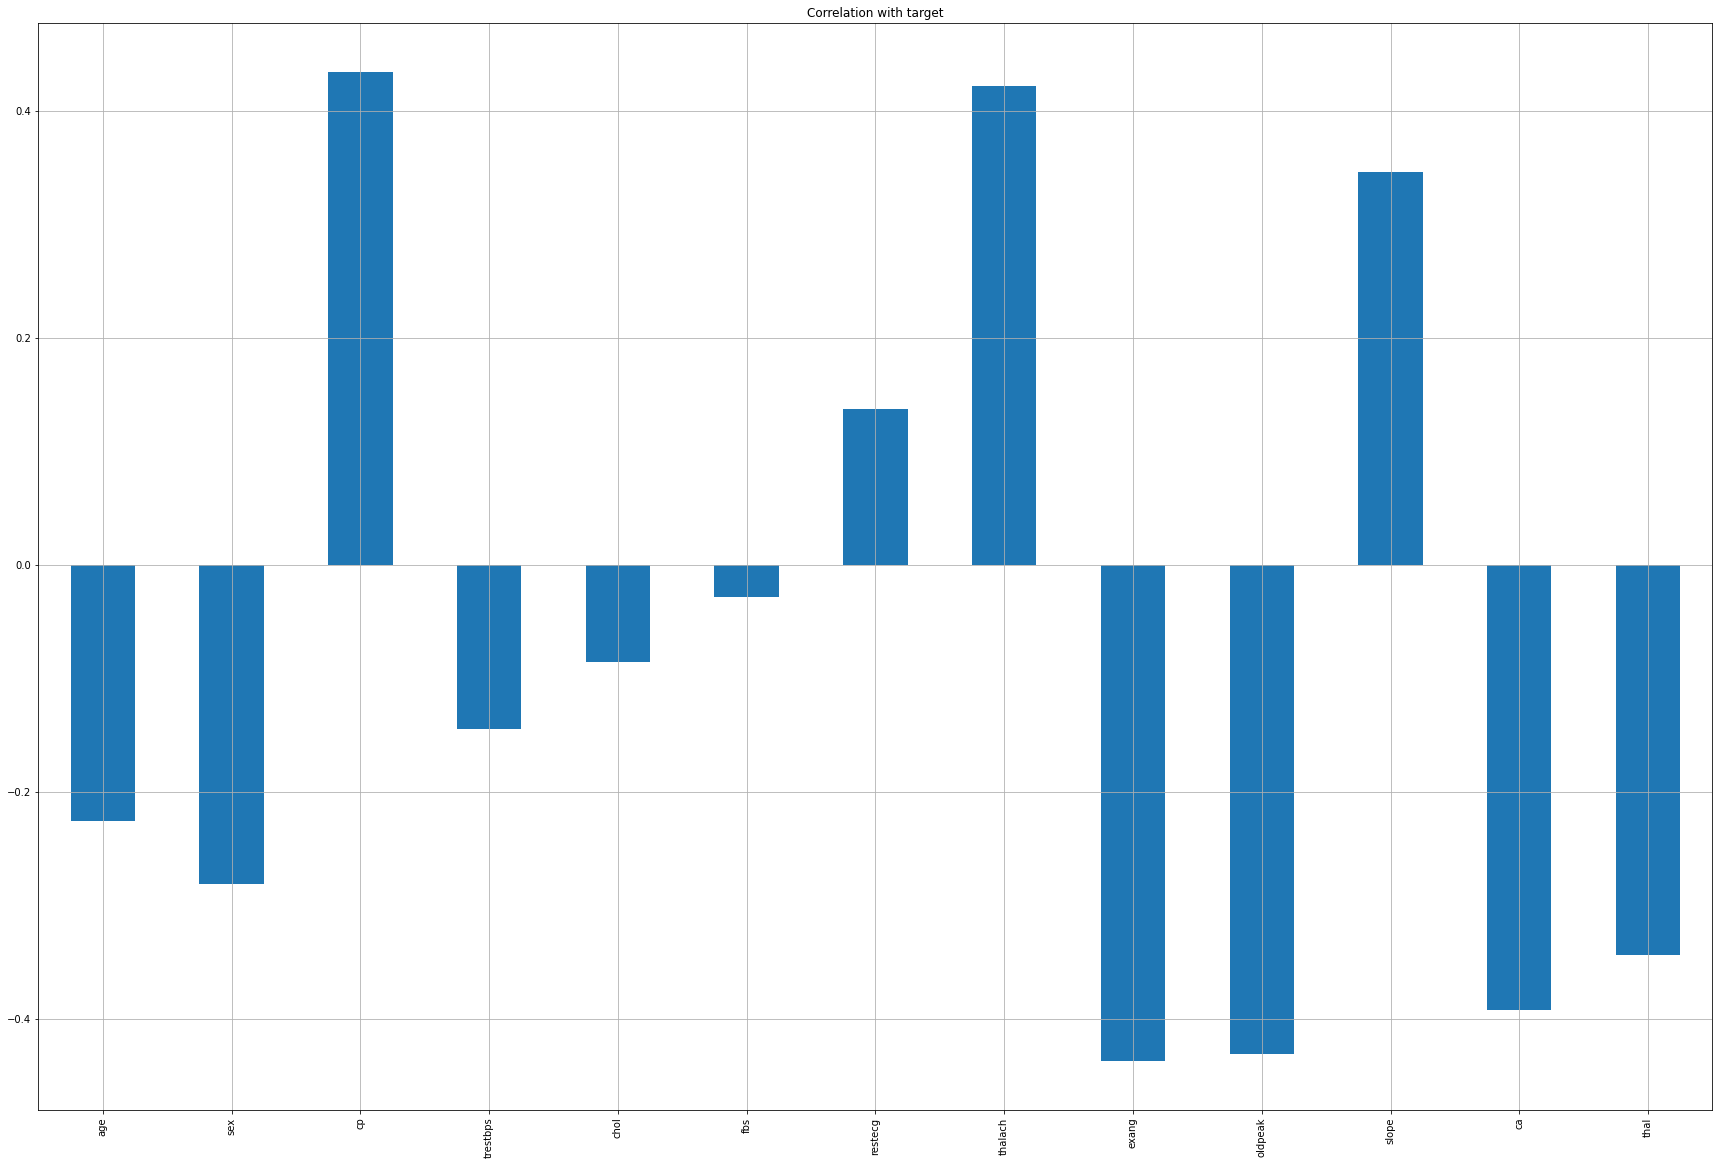

In [53]:
data.drop("target", axis = 1).corrwith(data.target).plot(kind = "bar", grid = True, figsize = (30, 20), title = "Correlation with target")

We've now explored the dataset enough to start scaling values prior to training the ML model. 